In [13]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

import os
import random
import numpy as np
import matplotlib.pyplot as plt
import cv2

# ignore information messgaes from tensorflow, but we will receieve error messages
os.environ['TFF_CPP_MIN_LOG_LEVEL'] = '2'

%matplotlib inline

In [14]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(f"Shape of x_train: {x_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print()
print(f"Shape of x_test: {x_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of x_train: (60000, 28, 28)
Shape of y_train: (60000,)

Shape of x_test: (10000, 28, 28)
Shape of y_test: (10000,)


Image (#5): Which is digit '2'


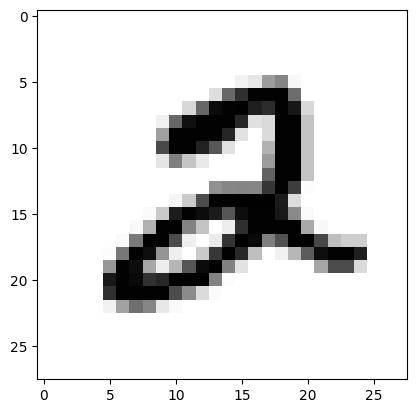

In [15]:
digit = 5 # Change to choose new digit
a = x_train[digit]
plt.imshow(a, cmap='gray_r')
print(f"Image (#{digit}): Which is digit '{y_train[digit]}'")

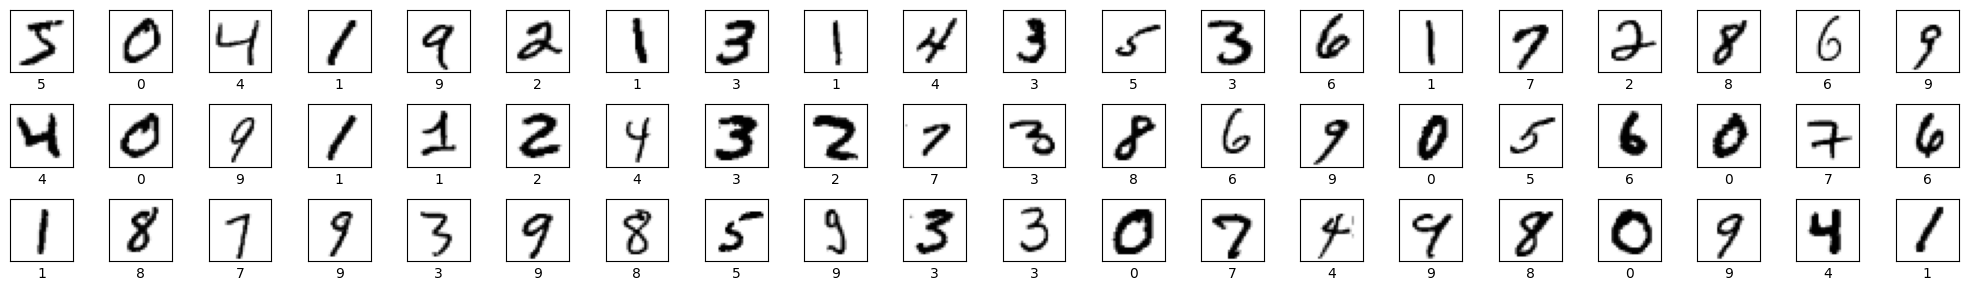

In [16]:
ROWS = 3
COLS = 20
i = 0

plt.figure(figsize=(20,3))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(x_train[i], cmap=plt.cm.gray_r)

        plt.xticks([])
        plt.yticks([])
        plt.xlabel(y_train[i])
        i += 1
plt.tight_layout()
plt.show()

In [17]:
x_train = x_train.reshape(-1, 28*28).astype("float32") / 255.0
x_test = x_test.reshape(-1, 28*28).astype("float32") / 255.0

Image (#5): Which is digit '2'


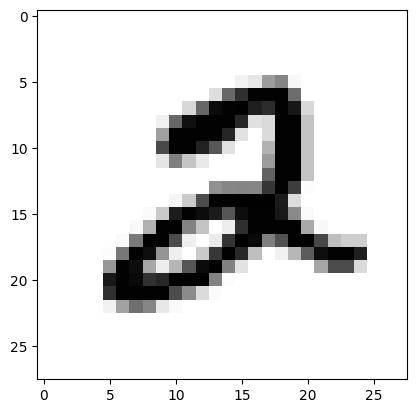

In [18]:
digit = 5 # Change to choose new digit
a = x_train[digit].reshape(28,28)
plt.imshow(a, cmap='gray_r')
print(f"Image (#{digit}): Which is digit '{y_train[digit]}'")

In [19]:
model = keras.Sequential([
    keras.Input(shape=(28*28,)),
    layers.Reshape(target_shape=(28, 28, 1)), # Reshape to image format
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(), # Flatten the output before the dense layers
    layers.Dense(units=128, activation='relu'),
    layers.Dense(units=10, activation='softmax')
])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ reshape_1 (Reshape)             │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [21]:
h = model.fit(x=x_train, y=y_train, epochs=10, batch_size=64, validation_split=0.3)

Epoch 1/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 41s 60ms/step - accuracy: 0.8721 - loss: 0.4217 - val_accuracy: 0.9766 - val_loss: 0.0752
Epoch 2/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 40s 58ms/step - accuracy: 0.9825 - loss: 0.0562 - val_accuracy: 0.9837 - val_loss: 0.0552
Epoch 3/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 41s 58ms/step - accuracy: 0.9882 - loss: 0.0373 - val_accuracy: 0.9852 - val_loss: 0.0506
Epoch 4/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 42s 60ms/step - accuracy: 0.9904 - loss: 0.0300 - val_accuracy: 0.9866 - val_loss: 0.0440
Epoch 5/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 41s 60ms/step - accuracy: 0.9924 - loss: 0.0226 - val_accuracy: 0.9879 - val_loss: 0.0422
Epoch 6/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 39s 60ms/step - accuracy: 0.9939 - loss: 0.0177 - val_accuracy: 0.9881 - val_loss: 0.0478
Epoch 7/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 39s 60ms/step - accuracy: 0.9960 - loss: 0.0111 - val_accuracy: 0.9853 - val_loss: 0.0515
Epoch 8/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 40s 58ms/step - accuracy: 0.9963 - loss: 0.0104 - 

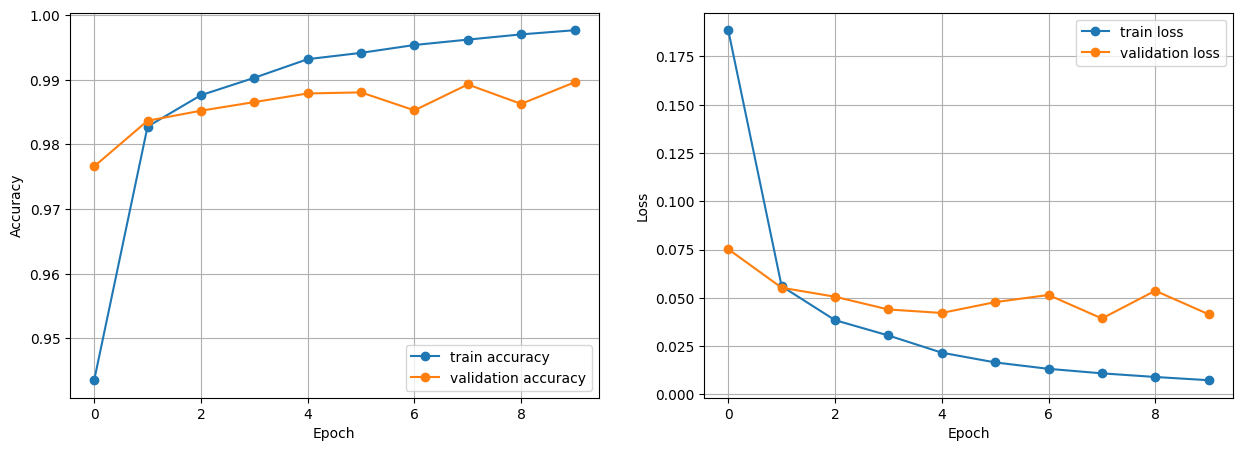

In [22]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [23]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('\nTest accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.9893 - loss: 0.0422

Test accuracy: 0.9907000064849854


In [24]:
predictions = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


In [25]:
model.save('/content/resources/data/dgf.h5')